# Analysis

 ### Data analysis
 1. Looking at the pie chart we can see that the study was very evenly split between female and male mouse subjects. 
 2. The summary statistics charts reveal that on average the Capomulin and the Ramicane are the most effective in reducing or maintaining tumor sizes amongst the subjects. Capomulin also had no outliers in their testing results, even with testing the most subjects. 
 3. Propiva had the least amount of subjects and, based of the cleaning of the duplicates, they also had the most errors/oversights in their testing procedures. 

In [8]:
%matplotlib widget

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [52]:
mouse_metadata_path = 'Mouse_metadata.csv'
study_results_path = 'Study_results.csv'

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

capomulin_trial_df = pd.merge(mouse_metadata, study_results, how='right', on="Mouse ID")
capomulin_trial_df = capomulin_trial_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
capomulin_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [12]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [13]:
#Checking the number of mice
subjects = capomulin_trial_df['Mouse ID'].unique()
subject_count = len(subjects)
subject_count

249

In [14]:
#Get the duplicate subjects by ID & Timepoint
#capomulin_trial_df.duplicated(subset=['Mouse ID'])
duplicated_mouse_ids = capomulin_trial_df[capomulin_trial_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]['Mouse ID'].unique()
duplicated_mouse_ids

array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = capomulin_trial_df[capomulin_trial_df['Mouse ID'].isin(duplicated_mouse_ids)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_capomulin_df = capomulin_trial_df.drop(['g989'])
cleaned_capomulin_df = capomulin_trial_df[capomulin_trial_df['Mouse ID'] != 'g989']
cleaned_capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
cleaned_capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [18]:
# Checking the number of mice in the clean DataFrame.
subjects_new = cleaned_capomulin_df['Mouse ID'].unique()
subject_new_count = len(subjects)
subject_new_count

249

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = cleaned_capomulin_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().reset_index()
median = cleaned_capomulin_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().reset_index()
variance = cleaned_capomulin_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().reset_index()
std_deviation = cleaned_capomulin_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().reset_index()
sem = cleaned_capomulin_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().reset_index()

summary_stats = pd.concat([mean.set_index('Drug Regimen'), 
                           median.set_index('Drug Regimen'), 
                           variance.set_index('Drug Regimen'), 
                           std_deviation.set_index('Drug Regimen'), 
                           sem.set_index('Drug Regimen')], 
                          axis=1)

summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance ', 'Tumor Volume Standard Deviation', 'Tumor Volume SEM']
summary_stats

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_capomulin_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

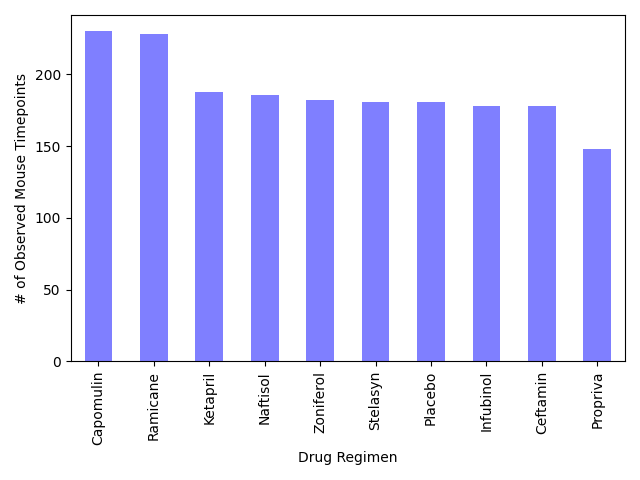

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#cleaned_capomulin_df.iloc().plot.bar()

drug_regimen_counts = cleaned_capomulin_df["Drug Regimen"].value_counts()

fig, axs = plt.subplots() 

drug_regimens = drug_regimen_counts.plot.bar(color='blue', alpha=0.5, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()


In [57]:
drug_regimen_counts = cleaned_capomulin_df["Drug Regimen"].value_counts()
drug_regimen_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

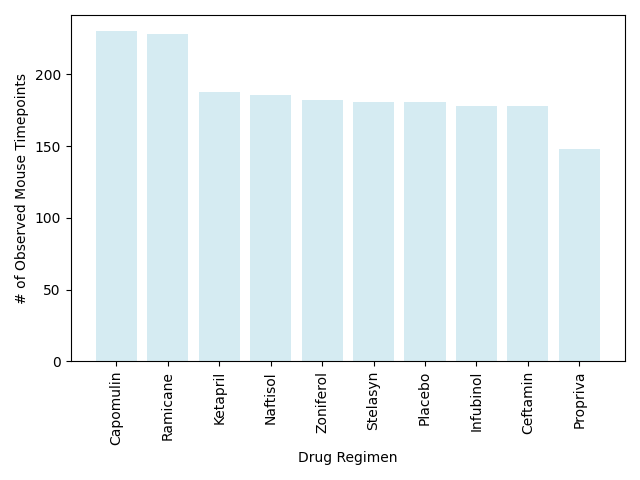

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_capomulin_df["Drug Regimen"].value_counts()

fig, axs = plt.subplots() 
x_axis = drug_regimen_counts.index.values
y_axis = drug_regimen_counts.values

plt.bar(x_axis, y_axis, color='lightblue', alpha=0.5, align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

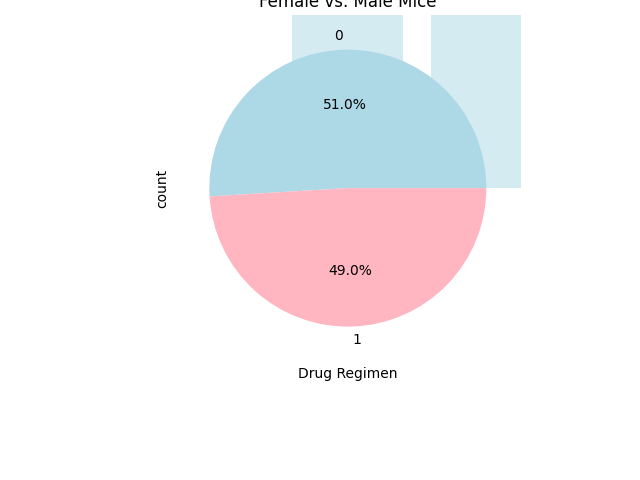

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_breakdown = cleaned_capomulin_df['Sex'].value_counts()
gender_breakdown

gender_breakdown.reset_index(drop=True, inplace=True)

gender_breakdown.plot.pie(subplots=True, autopct='%1.1f%%', colors=['lightblue', 'lightpink'])

plt.title('Female vs. Male Mice')
plt.show()

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = cleaned_capomulin_df[cleaned_capomulin_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

max_timepoint = final_tumor_volume.groupby('Mouse ID')['Timepoint'].max().reset_index()

merged_df = pd.merge(max_timepoint, capomulin_trial_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Filter the merged DataFrame to contain only data for the current treatment
    treatment_data = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the quartiles and IQR for the current treatment
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds to identify potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Locate potential outliers for the current treatment
    potential_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print information about potential outliers
    print(f"Potential outliers for {treatment}:")
    if len(potential_outliers) == 0:
        print("None")
    else:
        print(potential_outliers)

    # Print the quartile information
    print(f"IQR for {treatment}: {iqr}")
    print(f"Lower Quartile for {treatment}: {lower_quartile}")
    print(f"Upper Quartile for {treatment}: {upper_quartile}")
    print(f"Lower Bound for {treatment}: {lower_bound}")
    print(f"Upper Bound for {treatment}: {upper_bound}")
    print("\n")

Potential outliers for Capomulin:
None
IQR for Capomulin: 7.781863460000004
Lower Quartile for Capomulin: 32.37735684
Upper Quartile for Capomulin: 40.1592203
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549


Potential outliers for Ramicane:
None
IQR for Ramicane: 9.098536719999998
Lower Quartile for Ramicane: 31.56046955
Upper Quartile for Ramicane: 40.65900627
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135


Potential outliers for Infubinol:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR for Infubinol: 11.477135160000003
Lower Quartile for Infubinol: 54.04860769
Upper Quartile for Infubinol: 65.52574285
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001


Potential outliers for Ceftamin:
None
IQR for Ceftamin: 15.577752179999997
Lower Quartile for Ceftamin: 48.72207785
Upper Quartile for Ceftamin: 64.29983003
Lower Bound for Ceftamin: 25.355449580000002
Upper B

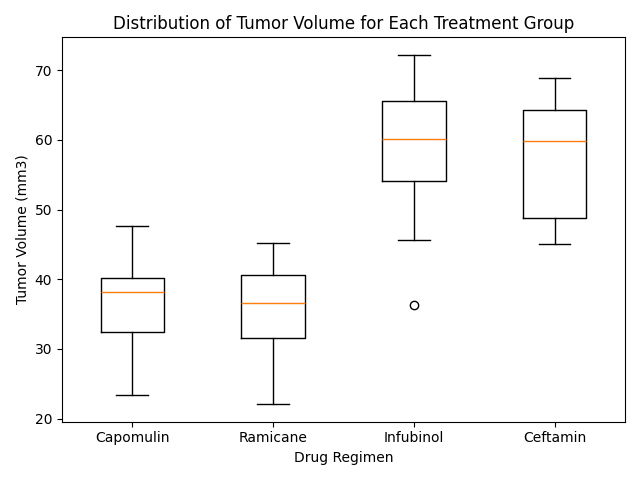

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, axs = plt.subplots() 
plt.boxplot(tumor_vol_data, labels=treatments)

selected_mouse_data.reset_index(drop=True, inplace=True)

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

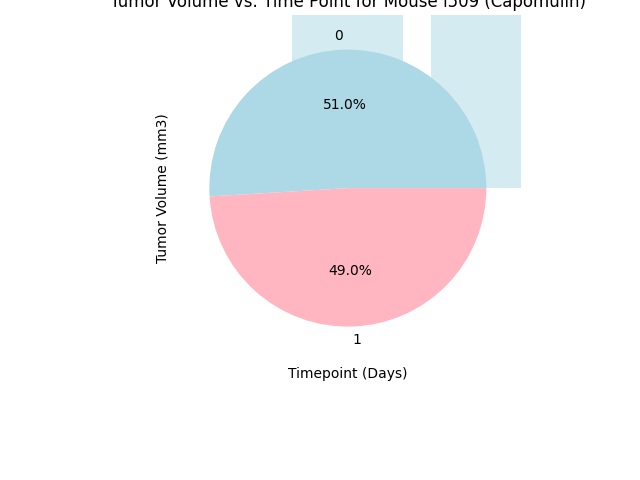

In [61]:
merged_df = cleaned_capomulin_df.loc[cleaned_capomulin_df['Mouse ID'] == "l509",:]
merged_df

plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {"l509"} (Capomulin)')

plt.show()

In [30]:
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].iloc[6]  
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]
selected_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
33,i738,45,37.311846,2,Capomulin,Female,23,20


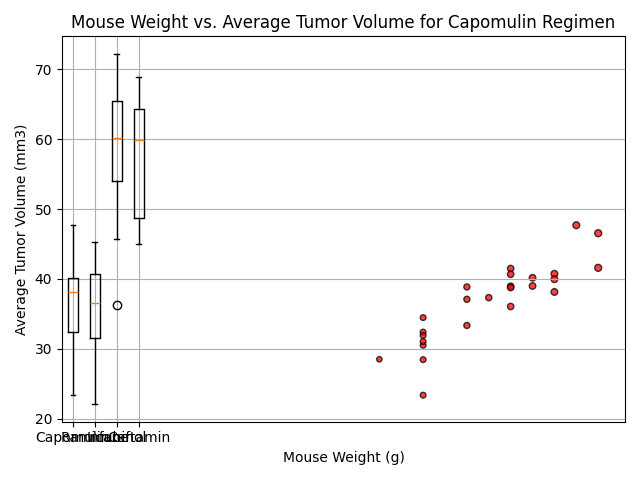

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
merged_df = pd.merge(max_timepoint, capomulin_trial_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, avg_tumor_volume, marker="o", facecolors="red", edgecolors="black",
            s=mouse_weight, alpha=0.75)

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen